In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd
import numpy as np

In [2]:
# Load data

X_train = pd.read_pickle("../Data/X_train.pkl")
X_test = pd.read_pickle("../Data/X_test.pkl")
y_train = pd.read_pickle("../Data/y_train.pkl")

In [3]:
# Prints the parameters leading to the highest score of a model

def clf_performance(clf, model_name):
    print(model_name)
    print('Best Score: ' + str(clf.best_score_))
    print('Best Parameters: ' + str(clf.best_params_))

In [4]:
# Find the particular parameters that lead to the highest score

lr = LogisticRegression()
param_grid = {
    'max_iter': [2000],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
    
}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
clf_lr_best = clf_lr.fit(X_train, y_train)
clf_performance(clf_lr_best, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.7953088300641149
Best Parameters: {'C': 0.03359818286283781, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [5]:
# Find the particular parameters that lead to the highest score

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3,5,7,9],
    'weights' : ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1,2]
    
}

clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train, y_train)
clf_performance(best_clf_knn, 'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8155462451596522
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [6]:
# Find the particular parameters that lead to the highest score

svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1, .5, 1, 2, 5, 10], 'C': [.1,1,10,100,1000]},
                                 {'kernel': ['linear'], 'C': [.1,1,10,100,1000]},
                                {'kernel': ['poly'], 'degree':[2,3,4,5], 'C': [.1,1,10,100,1000]}
                                ]

clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = 5, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train, y_train)
clf_performance(best_clf_svc, 'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8234431536850124
Best Parameters: {'C': 1, 'degree': 3, 'kernel': 'poly'}


In [7]:
# Find the particular parameters that lead to the highest score

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.8312956262299245
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


<AxesSubplot:>

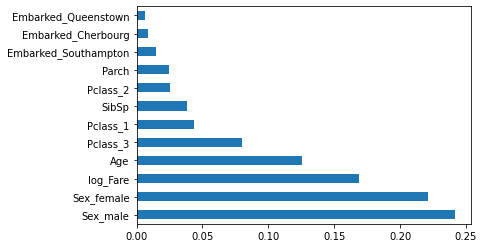

In [9]:
# Find the particular parameters that lead to the highest score

best_rf = best_clf_rf_rnd.best_estimator_.fit(X_train, y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index = X_train.columns)
feat_importances.nlargest(20).plot(kind = 'barh')

In [10]:
# Find the particular parameters that lead to the highest score

xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

#clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
#best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
#clf_performance(best_clf_xgb,'XGB')
clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train,y_train)
clf_performance(best_clf_xgb_rnd,'XGB')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.78627563        nan        nan        nan 0.78402844
        nan 0.61754586 0.78627563 0.61754586 0.78518377 0.61754586
 0.81217546 0.83351108        nan        nan 0.83915445        nan
        nan        nan 0.80091411        nan        nan        nan
 0.61754586 0.83353647        nan        nan        nan 0.81435917
 0.82228147        nan        nan        nan        nan 0.80768108
 0.78402209 0.78627563        nan        nan 0.80657018 0.77841046
 0.64451216 0.80990922        nan        nan        nan 0.82005332
 0.81552085        nan 0.82228147 0.81668254 0.78627563        nan
 0.81215641 0.61754586 0.77841046 0.78627563        nan 0.78627563
 0.61754586 0.79640069 0.81103282        nan 0.78627563        nan
        nan 0.78853552 0.825684          nan 0.79867962        nan
        nan        nan        nan 0.82004698      

XGB
Best Score: 0.8414270297721069
Best Parameters: {'subsample': 0.8, 'sampling_method': 'uniform', 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 0.1, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [11]:
# Find the particular parameters that lead to the highest score

xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: 0.8425315812861042
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 450, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.65}


In [12]:
# Make a prediction based on the best xgb model

y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test).astype(int)
xgb_submission = {'PassengerId': X_test.index, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data = xgb_submission)
submission_xgb.to_csv('../Submissions/sgb_submission.csv', index = False)

In [14]:
# Use a voting classifier to find the best scores using all the different models

best_lr = clf_lr_best.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf_rnd.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], voting = 'hard')
voting_clf_soft = VotingClassifier(estimators = [('knn', best_knn), ('svc', best_svc), ('rf', best_rf)], voting = 'soft')

voting_clf_all = VotingClassifier(estimators = [('knn', best_knn), ('svc', best_svc), ('rf', best_rf), ('xgb', best_xgb), ('lr', best_lr)
    ], voting = 'soft')

print('voting_clf_hard: ', cross_val_score(voting_clf_hard, X_train, y_train, cv = 5))
print('voting_clf_hard: ', cross_val_score(voting_clf_hard, X_train, y_train, cv = 5).mean())

print('voting_clf_soft: ', cross_val_score(voting_clf_soft, X_train, y_train, cv = 5))
print('voting_clf_soft: ', cross_val_score(voting_clf_soft, X_train, y_train, cv = 5).mean())

print('voting_clf_all: ', cross_val_score(voting_clf_all, X_train, y_train, cv = 5))
print('voting_clf_all: ', cross_val_score(voting_clf_all, X_train, y_train, cv = 5).mean())



voting_clf_hard:  [0.80898876 0.79213483 0.85955056 0.79775281 0.85310734]
voting_clf_hard:  0.8223068621849807
voting_clf_soft:  [0.79213483 0.80898876 0.82022472 0.79213483 0.8700565 ]
voting_clf_soft:  0.8178315241541293
voting_clf_all:  [0.81460674 0.80898876 0.84831461 0.79775281 0.86440678]
voting_clf_all:  0.8268139402018664


In [15]:
# Use a voting classifier to find the best scores using all the different models with different weights for models

params = {'weights': [[1,1,1], [1,2,1], [1,1,2], [2,1,1], [2,2,1], [2,1,2], [1,2,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv=5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train, y_train)
clf_performance(best_clf_weight, 'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
VC Weights
Best Score: 0.8223259061766013
Best Parameters: {'weights': [1, 1, 2]}


In [16]:
# Find the scores for each voting classifier

voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)
voting_clf_all.fit(X_train, y_train)

best_rf.fit(X_train, y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test).astype(int)
y_hat_rf = best_rf.predict(X_test).astype(int)
y_hat_vc_soft = voting_clf_soft.predict(X_test).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test).astype(int)


In [17]:
# Make submissions based on the different voting classifiers

final_data = {'PassengerId': X_test.index, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': X_test.index, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': X_test.index, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': X_test.index, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_comp = {'PassengerId': X_test.index, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all,  }
comparison = pd.DataFrame(data=final_data_comp)

In [18]:
# Compare the voting classifiers

comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [19]:
comparison.difference_hard_all.value_counts()

0    396
1     22
Name: difference_hard_all, dtype: int64